$$
\newcommand{\ped}[1]{_{\mathrm{#1}}}
\newcommand{\ap}[1]{^{\mathrm{#1}}}
\newcommand{\nvector}[1]{\mathbf{#1}}
\newcommand{\nmatrix}[1]{\mathit{#1}}
\newcommand{\unitvector}[1]{\hat{\nvector{e}}_{#1}}
\newcommand{\volume}{\mathcal{V}}
\newcommand{\average}[1]{\overline{#1}}
\newcommand{\rate}[1]{\dot{#1}}
\newcommand{\flux}[1]{{#1}''}
\newcommand{\curl}[1]{\nabla\times {#1}}
\newcommand{\curlv}[1]{\curl{\nvector{#1}}}
\newcommand{\divergent}[1]{\nabla \cdot #1}
\newcommand{\divergentv}[1]{\divergent{\nvector{#1}}}
\newcommand{\divergentpar}[1]{\divergent{\left( #1 \right)}}
\newcommand{\gradient}[1]{\nabla {#1}}
\newcommand{\gradientpar}[1]{\gradient{\left( {#1} \right)}}
\newcommand{\laplacian}[1]{\nabla^2 #1}
\newcommand{\laplacianpar}[1]{\laplacian{\left( #1 \right)}}
\newcommand{\vectornorm}[1]{\left\lVert #1 \right\rVert}
\newcommand{\diffp}[2]{\frac{\partial {#1}}{\partial {#2}}}
\newcommand{\diffps}[2]{\frac{\partial^2 {#1}}{\partial {#2}^2}}
\newcommand{\rvec}{\nvector{r}}
\newcommand{\nvh}{\nvector{H}}
\newcommand{\nvb}{\nvector{B}}
\newcommand{\nvrem}{\nvector{B}\ped{rem}}
\newcommand{\nvbrem}{\nvrem}
\newcommand{\nvm}{\nvector{M}}
\newcommand{\mur}{\mu\ped{r}}
\newcommand{\nvbremhat}{\hat{\nvector{B}}\ped{rem}}
\newcommand{\acoef}[2]{a_{{#1},\mathrm{#2}}}
\newcommand{\bcoef}[2]{b_{{#1},\mathrm{#2}}}
\newcommand{\Azexpr}[1]{A_{\mathrm{#1}\, z}}
\newcommand{\bremii}{B_{\mathrm{rem,II}}}
\newcommand{\bremiv}{B_{\mathrm{rem,IV}}}
\newcommand{\aIII}{\acoef{1}{III}}
\newcommand{\bIII}{\bcoef{1}{III}}
\newcommand{\nvbIII}{\nvector{B}\ped{III}}
\newcommand{\BIII}{B\ped{III}}
\newcommand{\diffd}[1]{\mathrm{d}\,{#1}}
$$

# TeslaMax Sample Calculations

Teslamax model:

<img src="figures/teslamax.png" width=500>

Tell the location of the TeslaMax Java class file:

In [1]:
from pathlib import Path
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import teslamax
from teslamax import TeslaMaxGeometry, TeslaMaxPreDesign, TeslaMaxModel
import nemplot

## Playground

In [2]:
teslamax_playground = "teslamax-play"


In [3]:
os.getcwd()

'C:\\Users\\fabiofortkamp\\code\\TeslaMax'

### Magnetic Profile

In [4]:
# these are the parameters that are found to produce a near-instantaneous profile
param_dict = {"R_i": 0.015,
                "R_o": 0.070,
                "h_gap": 0.020,
                "R_s": 0.140,
                "h_fc": 0.010,
                "R_e": 0.3,
                "n_IV": 3,
                "phi_S_IV": 45,
                "n_II": 3,
                "phi_C_II": 15,
                "phi_S_II": 45,
                "B_rem_II_1": 1.4,
                "B_rem_II_2": 1.4,
                "B_rem_II_3": 1.4,
                "mu_r_II": 1.05,
                "B_rem_IV_1": 1.4,
                "B_rem_IV_2": 1.4,
                "B_rem_IV_3": 1.4,
                "mu_r_IV": 1.05,
              "linear_iron": 1,
              "mu_r_iron": 5e3,
                          "l_element_min": 1e-3,
            "l_element_max": 3e-2,
            "n_narrow": 2,
              "Hc_j": 900e3
             }

alpha_rem_vector = np.array([-3.67109344,4.98966041,-15.7967738,8.2380897,30.8698398,87.03318185])

In [5]:
tmpd = TeslaMaxPreDesign(params=param_dict)

tmm = TeslaMaxModel(tmpd,alpha_rem_vector,
                   path=teslamax_playground)

In [6]:
%%time

tmm.run(verbose=True)

*******************************************
***COMSOL 5.4.0.295 progress output file***
*******************************************
Thu Feb 21 09:50:30 BRT 2019
COMSOL Multiphysics 5.4 (Build: 295) starting in batch mode
Running: C:\Users\fabiofortkamp\code\TeslaMax\java\TeslaMax.class
---------- Current Progress: 100 % - Updating selections
Memory: 374/376 544/546
           Current Progress:   0 % - Circle 1
Memory: 378/380 548/549
           Current Progress:   8 % - Circle 2
Memory: 380/380 549/549
-          Current Progress:  17 % - Difference 1
Memory: 379/380 548/549
---------  Current Progress:  93 % - Resolving domains
Memory: 382/382 549/549
           Current Progress:   0 % - Circle 1
Memory: 385/385 553/553
           Current Progress:   8 % - Circle 2
-          Current Progress:  17 % - Difference 1
---------  Current Progress:  93 % - Resolving domains
           Current Progress:   0 % - Cylinder Block - Iron II Wedge 1Q
Memory: 384/386 551/554
           Current Prog

In [7]:
a,b = tmm.get_profile_data()

In [8]:
a

array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,
        13.5,  14. ,  14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,
        18. ,  18.5,  19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,
        22.5,  23. ,  23.5,  24. ,  24.5,  25. ,  25.5,  26. ,  26.5,
        27. ,  27.5,  28. ,  28.5,  29. ,  29.5,  30. ,  30.5,  31. ,
        31.5,  32. ,  32.5,  33. ,  33.5,  34. ,  34.5,  35. ,  35.5,
        36. ,  36.5,  37. ,  37.5,  38. ,  38.5,  39. ,  39.5,  40. ,
        40.5,  41. ,  41.5,  42. ,  42.5,  43. ,  43.5,  44. ,  44.5,
        45. ,  45.5,  46. ,  46.5,  47. ,  47.5,  48. ,  48.5,  49. ,
        49.5,  50. ,  50.5,  51. ,  51.5,  52. ,  52.5,  53. ,  53.5,
        54. ,  54.5,  55. ,  55.5,  56. ,  56.5,  57. ,  57.5,  58. ,
        58.5,  59. ,  59.5,  60. ,  60.5,  61. ,  61.5,  62. ,  62.5,
        63. ,  63.5,

C:\Users\fabiofortkamp\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


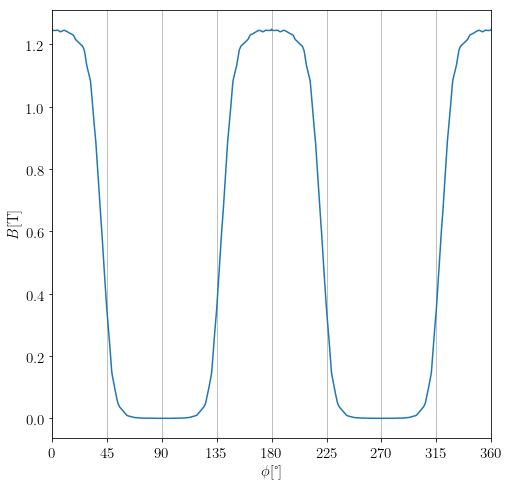

In [9]:
%matplotlib inline


profile_fig, profile_axes = nemplot.create_plot(xlabel=r'$\phi [\si{\degree}]$',
                                               ylabel=r'$B [\si{\tesla}]$')

phi_vector, B_vector = tmm.get_profile_data()

profile_axes.plot(phi_vector,B_vector)
profile_axes.set_xlim(0,np.max(phi_vector))
profile_axes.set_xticks(np.linspace(0,np.max(phi_vector),9))
profile_axes.xaxis.grid(True)

In [10]:
s = tmm.get_results_series()
print(s)

B_high[T]                   1.104728e+00
B_low[T]                    3.867600e-02
A_gap[m2]                   1.005300e-02
A_magnet[m2]                2.296000e-02
-H_Brem_II_max[A/m]         6.762598e+05
-H_Brem_IV_max[A/m]         1.277286e+06
A_demag[m2]                 3.800000e-05
Demagnetized fraction[%]    3.779966e-01
Name: COMSOL Main Results, dtype: float64


### Magnet profile - comparison between linear and non-linear iron regions

In [11]:
param_dict_linear_5000 = {"R_i": 0.015,
                "R_o": 0.070,
                "h_gap": 0.020,
                "R_s": 0.140,
                "h_fc": 0.010,
                "R_e": 2,
                "n_IV": 3,
                "phi_S_IV": 45,
                "n_II": 3,
                "phi_C_II": 15,
                "phi_S_II": 45,
                "B_rem_II_1": 1.4,
                "B_rem_II_2": 1.4,
                "B_rem_II_3": 1.4,
                "mu_r_II": 1.05,
                "B_rem_IV_1": 1.4,
                "B_rem_IV_2": 1.4,
                "B_rem_IV_3": 1.4,
                "mu_r_IV": 1.05,
              "linear_iron": 1,
              "mu_r_iron": 5e3,
                                      "l_element_min": 1e-3,
            "l_element_max": 3e-2,
            "n_narrow": 2,
                          "Hc_j":900e3
             }

tmpd_linear_5000 = TeslaMaxPreDesign(param_dict_linear_5000)

param_dict_non_linear = param_dict_linear_5000.copy()
param_dict_non_linear["linear_iron"] = 0
tmpd_non_linear = TeslaMaxPreDesign(param_dict_non_linear)

param_dict_linear_1000 = param_dict_linear_5000.copy()
param_dict_linear_1000["mu_r_iron"] = 1e3
tmpd_linear_1000 = TeslaMaxPreDesign(param_dict_linear_1000)



In [12]:
tmm_linear_5000 = TeslaMaxModel(tmpd_linear_5000,alpha_rem_vector,
                               path=teslamax_playground)
tmm_linear_5000.run(verbose=True)

phi_vector_linear_5000, B_vector_linear_5000 = tmm_linear_5000.get_profile_data()


*******************************************
***COMSOL 5.4.0.295 progress output file***
*******************************************
Thu Feb 21 09:51:00 BRT 2019
COMSOL Multiphysics 5.4 (Build: 295) starting in batch mode
Running: C:\Users\fabiofortkamp\code\TeslaMax\java\TeslaMax.class
---------- Current Progress: 100 % - Updating selections
Memory: 377/377 538/538
           Current Progress:   0 % - Circle 1
Memory: 375/384 537/545
           Current Progress:   8 % - Circle 2
Memory: 376/384 537/545
-          Current Progress:  17 % - Difference 1
---------  Current Progress:  93 % - Resolving domains
Memory: 378/384 537/545
           Current Progress:   0 % - Circle 1
Memory: 380/384 539/545
           Current Progress:   8 % - Circle 2
-          Current Progress:  17 % - Difference 1
---------  Current Progress:  93 % - Resolving domains
Memory: 380/384 540/545
           Current Progress:   0 % - Cylinder Block - Iron II Wedge 1Q
Memory: 388/388 547/547
           Current Prog

In [13]:
tmm_linear_1000 = TeslaMaxModel(tmpd_linear_1000,alpha_rem_vector,
                               path=teslamax_playground)
tmm_linear_1000.run(verbose=True)

phi_vector_linear_1000, B_vector_linear_1000 = tmm_linear_1000.get_profile_data()


*******************************************
***COMSOL 5.4.0.295 progress output file***
*******************************************
Thu Feb 21 09:51:26 BRT 2019
COMSOL Multiphysics 5.4 (Build: 295) starting in batch mode
Running: C:\Users\fabiofortkamp\code\TeslaMax\java\TeslaMax.class
---------- Current Progress: 100 % - Updating selections
Memory: 374/374 542/543
           Current Progress:   0 % - Circle 1
Memory: 373/381 542/549
           Current Progress:   8 % - Circle 2
Memory: 374/381 542/549
-          Current Progress:  17 % - Difference 1
---------  Current Progress:  93 % - Resolving domains
Memory: 376/381 542/549
           Current Progress:   0 % - Circle 1
Memory: 377/381 544/549
           Current Progress:   8 % - Circle 2
-          Current Progress:  17 % - Difference 1
---------  Current Progress:  93 % - Resolving domains
Memory: 378/381 544/549
           Current Progress:   0 % - Cylinder Block - Iron II Wedge 1Q
Memory: 387/387 554/554
           Current Prog

In [14]:
tmm_non_linear = TeslaMaxModel(tmpd_non_linear,alpha_rem_vector,
                               path=teslamax_playground)
tmm_non_linear.run(verbose=True)

phi_vector_non_linear, B_vector_non_linear = tmm_non_linear.get_profile_data()


*******************************************
***COMSOL 5.4.0.295 progress output file***
*******************************************
Thu Feb 21 09:51:49 BRT 2019
COMSOL Multiphysics 5.4 (Build: 295) starting in batch mode
Running: C:\Users\fabiofortkamp\code\TeslaMax\java\TeslaMax.class
---------- Current Progress: 100 % - Updating selections
Memory: 377/377 537/538
           Current Progress:   0 % - Circle 1
Memory: 374/384 535/545
           Current Progress:   8 % - Circle 2
Memory: 375/384 535/545
-          Current Progress:  17 % - Difference 1
---------  Current Progress:  93 % - Resolving domains
Memory: 377/384 536/545
           Current Progress:   0 % - Circle 1
Memory: 379/384 538/545
           Current Progress:   8 % - Circle 2
-          Current Progress:  17 % - Difference 1
---------  Current Progress:  93 % - Resolving domains
           Current Progress:   0 % - Cylinder Block - Iron II Wedge 1Q
Memory: 388/388 547/547
           Current Progress:   0 % - Circle 1
M

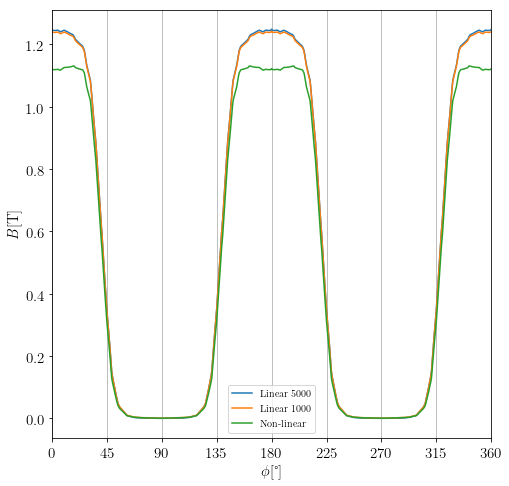

In [15]:
%matplotlib inline

profile_fig, profile_axes = nemplot.create_plot(xlabel=r'$\phi [\si{\degree}]$',
                                               ylabel=r'$B [\si{\tesla}]$')

profile_axes.plot(phi_vector_linear_5000,B_vector_linear_5000,label="Linear 5000")
profile_axes.plot(phi_vector_linear_1000,B_vector_linear_1000,label="Linear 1000")
profile_axes.plot(phi_vector_non_linear,B_vector_non_linear,label="Non-linear")

profile_axes.set_xlim(0,np.max(phi_vector))
profile_axes.set_xticks(np.linspace(0,np.max(phi_vector),9))
profile_axes.xaxis.grid(True)
profile_axes.legend(loc='best')


### Magnet profile - comparison between iron and magnet core

In [16]:
param_dict_magnet = {"R_i": 0.015,
                "R_o": 0.070,
                "h_gap": 0.020,
                "R_s": 0.140,
                "h_fc": 0.020,
                "R_e": 2,
                "n_IV": 3,
                "phi_S_IV": 45,
                "n_II": 2,
                "phi_C_II": 15,
                "phi_S_II": 45,
                 "B_rem_II_1": 1.4,
                "B_rem_II_2": 1.4,
                "B_rem_II_3": 1.4,
                "mu_r_II": 1.05,
                "B_rem_IV_1": 1.4,
                "B_rem_IV_2": 1.4,
                "B_rem_IV_3": 1.4,
                "mu_r_IV": 1.05,
                "linear_iron": 0,
                                 "l_element_min": 1e-3,
            "l_element_max": 3e-2,
            "n_narrow": 2,
                     "Hc_j": 900e3
             }

alpha_rem_vector_2 = [-45, -45, 15, 45, 75]

tmpd_magnet = TeslaMaxPreDesign(param_dict_magnet)

param_dict_iron = param_dict_magnet.copy()
param_dict_iron["n_II"] = 0
param_dict_iron["phi_C_II"] = 0
param_dict_iron["phi_S_II"] = 0
tmpd_iron = TeslaMaxPreDesign(param_dict_iron)
alpha_rem_vector_2_iron = np.array([15, 45, 75])


In [17]:
tmm_magnet = TeslaMaxModel(tmpd_magnet,alpha_rem_vector_2,
                          path=teslamax_playground)
tmm_magnet.run(verbose=True)
phi_vector_magnet, B_vector_magnet = tmm_magnet.get_profile_data()

*******************************************
***COMSOL 5.4.0.295 progress output file***
*******************************************
Thu Feb 21 09:52:15 BRT 2019
COMSOL Multiphysics 5.4 (Build: 295) starting in batch mode
Running: C:\Users\fabiofortkamp\code\TeslaMax\java\TeslaMax.class
---------- Current Progress: 100 % - Updating selections
Memory: 374/375 537/539
           Current Progress:   0 % - Circle 1
Memory: 380/381 543/544
           Current Progress:   8 % - Circle 2
Memory: 381/381 544/544
-          Current Progress:  17 % - Difference 1
---------  Current Progress:  93 % - Resolving domains
Memory: 383/383 545/545
           Current Progress:   0 % - Circle 1
Memory: 387/387 548/548
           Current Progress:   8 % - Circle 2
-          Current Progress:  17 % - Difference 1
---------  Current Progress:  93 % - Resolving domains
Memory: 389/389 551/551
           Current Progress:   0 % - Cylinder Block - Iron II Wedge 1Q
Memory: 387/393 549/554
           Current Prog

In [18]:
tmm_iron = TeslaMaxModel(tmpd_iron,alpha_rem_vector_2_iron,
                          path=teslamax_playground)
tmm_iron.run(verbose=True)
phi_vector_iron, B_vector_iron = tmm_iron.get_profile_data()

*******************************************
***COMSOL 5.4.0.295 progress output file***
*******************************************
Thu Feb 21 09:52:39 BRT 2019
COMSOL Multiphysics 5.4 (Build: 295) starting in batch mode
Running: C:\Users\fabiofortkamp\code\TeslaMax\java\TeslaMax.class
---------- Current Progress: 100 % - Updating selections
Memory: 374/374 547/547
           Current Progress:   0 % - Circle 1
Memory: 374/382 547/555
           Current Progress:   8 % - Circle 2
-          Current Progress:  17 % - Difference 1
---------  Current Progress:  93 % - Resolving domains
Memory: 376/382 547/555
           Current Progress:   0 % - Circle 1
Memory: 377/382 549/555
           Current Progress:   8 % - Circle 2
-          Current Progress:  17 % - Difference 1
Memory: 378/382 549/555
---------  Current Progress:  93 % - Resolving domains
           Current Progress:   0 % - Cylinder Block - Iron II
Memory: 384/384 554/555
           Current Progress:   0 % - Circle 1
          

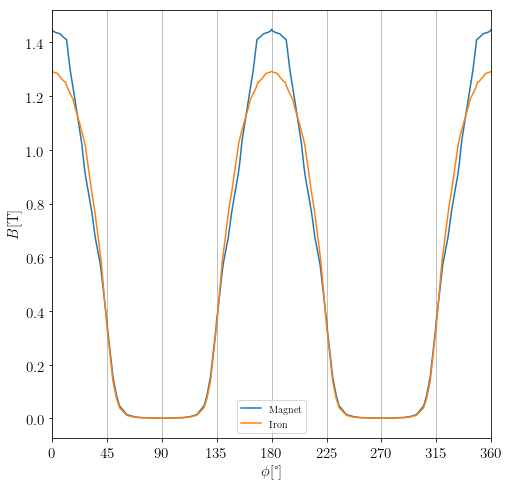

In [19]:
%matplotlib inline


profile_fig, profile_axes = nemplot.create_plot(xlabel=r'$\phi [\si{\degree}]$',
                                               ylabel=r'$B [\si{\tesla}]$')

profile_axes.plot(phi_vector_magnet,B_vector_magnet,label="Magnet")
profile_axes.plot(phi_vector_iron,B_vector_iron,label="Iron")
profile_axes.set_xlim(0,np.max(phi_vector))
profile_axes.set_xticks(np.linspace(0,np.max(phi_vector),9))
profile_axes.xaxis.grid(True)
profile_axes.legend(loc='best')
